In [3]:
#Read in the gapminder_clean.csv data as a pandas DataFrame.

import pandas as pd

df = pd.read_csv('gapminder_clean.csv')
df.head()

,Unnamed: 0,Country Name,Year,"Agriculture, value added (% of GDP)",CO2 emissions (metric tons per capita),Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)",GDP growth (annual %),Imports of goods and services (% of GDP),"Industry, value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Population density (people per sq. km of land area),"Services, etc., value added (% of GDP)",pop,continent,gdpPercap
0,0,Afghanistan,1962,NaN,0.073781,21.276422,NaN,NaN,4.878051,7.450,NaN,9.349593,NaN,NaN,33.219902,14.312061,NaN,10267083.0,Asia,853.100710
1,1,Afghanistan,1967,NaN,0.123782,9.917662,NaN,NaN,6.772908,7.450,NaN,14.209827,NaN,NaN,35.389415,15.881812,NaN,11537966.0,Asia,836.197138
2,2,Afghanistan,1972,NaN,0.130820,18.880833,NaN,NaN,14.763231,7.450,NaN,18.105850,NaN,NaN,37.610146,17.947027,NaN,13079460.0,Asia,739.981106
3,3,Afghanistan,1977,NaN,0.183118,13.836822,NaN,NaN,11.662904,7.449,NaN,14.823175,NaN,NaN,40.110146,19.998926,NaN,14880372.0,Asia,786.113360
4,4,Afghanistan,1982,NaN,0.165879,NaN,NaN,NaN,NaN,7.450,NaN,NaN,NaN,NaN,43.230732,19.402324,NaN,12881816.0,Asia,978.011439


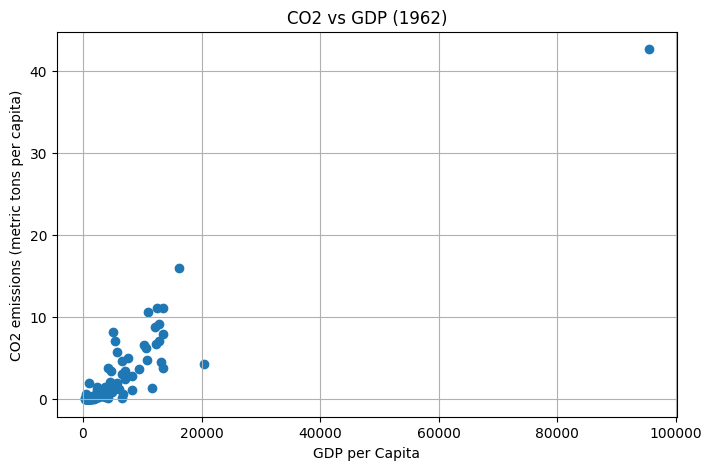

In [4]:
#Filter the data to include only rows where Year is 1962 and then make a scatter plot comparing
#'CO2 emissions (metric tons per capita)' and gdpPercap for the filtered data.

import matplotlib.pyplot as plt

# Filter the data to include only rows where Year is 1962
df_1962 = df[df['Year'] == 1962]
df_1962.head()

# CO2 與 GDP 的散點圖
plt.figure(figsize=(8, 5))
plt.scatter(df_1962['gdpPercap'], df_1962['CO2 emissions (metric tons per capita)'])
plt.xlabel('GDP per Capita')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.title('CO2 vs GDP (1962)')
plt.grid(True)
plt.show()

In [5]:
#On the filtered data, calculate the correlation of 'CO2 emissions (metric tons per capita)' and gdpPercap.
#What is the correlation and associated p value?

from scipy.stats import pearsonr


#print(x.isna().sum())
#print(y.isna().sum())

#dropna
filtered_df = df_1962[['gdpPercap', 'CO2 emissions (metric tons per capita)']].dropna()

#計算
x = filtered_df['gdpPercap']
y = filtered_df['CO2 emissions (metric tons per capita)']
corr, pval = pearsonr(x, y)

print(f"r = {corr:.4f}, p = {pval:.4e}")

r = 0.9261, p = 1.1287e-46


In [6]:
#On the unfiltered data, answer "In what year is the correlation between
#'CO2 emissions (metric tons per capita)' and gdpPercap the strongest?" Filter the dataset to that year for the next step...

correlation_by_year = []
years = df['Year'].unique()

#loop
for year in years:
    temp = df[df['Year'] == year][['gdpPercap', 'CO2 emissions (metric tons per capita)']].dropna()

    if len(temp) > 2:  # 至少要有三筆資料才能計算 correlation
        r, p = pearsonr(temp['gdpPercap'], temp['CO2 emissions (metric tons per capita)'])
        correlation_by_year.append({'Year': year, 'r': r, 'p': p})

# 轉成 DataFrame
corr_df = pd.DataFrame(correlation_by_year)

# 找出 r 最大的那一年（正相關最強）
max_corr_row = corr_df.loc[corr_df['r'].idxmax()]
print("In what year is the correlation strongest：", int(max_corr_row['Year']))
print("r = {:.4f}, p = {:.4e}".format(max_corr_row['r'], max_corr_row['p']))

In what year is the correlation strongest： 1967
r = 0.9388, p = 3.3971e-53


In [ ]:
#Using plotly or bokeh, create an interactive scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap,
#where the point size is determined by pop (population) and the color is determined by the continent.

import plotly.express as px

filtered = df[df['Year'] == 1967][['Country Name', 'gdpPercap', 'CO2 emissions (metric tons per capita)', 'pop', 'continent']].dropna()

# 畫圖
fig = px.scatter(
    filtered,
    x='gdpPercap',
    y='CO2 emissions (metric tons per capita)',
    size='pop',
    color='continent',
    hover_name='Country Name',
    title=f"CO2 vs GDP per Capita in 1967",
    size_max=60
)

fig.show()

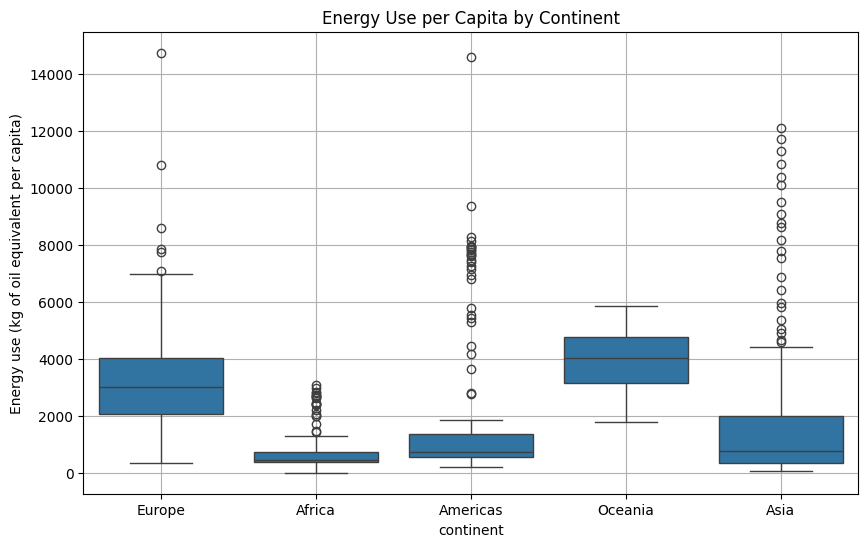

F = 51.4592
p = 8.5270e-39
✅ Significant difference found!


In [ ]:
#What is the relationship between continent and 'Energy use (kg of oil equivalent per capita)'? (Stats test needed)

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# dropna
df_energy = df[['continent', 'Energy use (kg of oil equivalent per capita)']].dropna()


# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='continent', y='Energy use (kg of oil equivalent per capita)', data=df_energy)
plt.title("Energy Use per Capita by Continent")
plt.grid(True)
plt.show()

# ANOVA
grouped_data = [group['Energy use (kg of oil equivalent per capita)'].values for name, group in df_energy.groupby('continent')]

f_stat, p_value = f_oneway(*grouped_data)

print(f"F = {f_stat:.4f}")
print(f"p = {p_value:.4e}")

if p_value < 0.05:
    print("✅ Significant difference found!")
else:
    print("❌ No significant difference.")

<ipython-input-41-3268998961>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




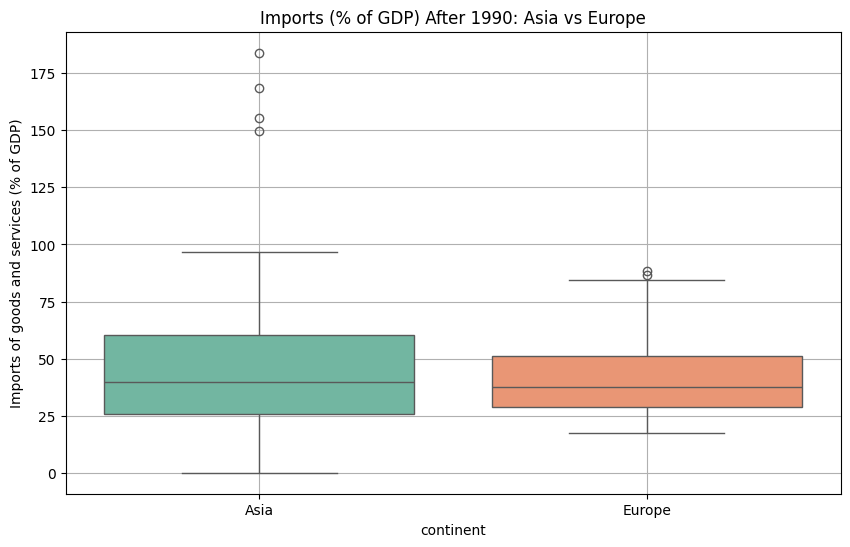

T-statistic: 1.355
P-value: 0.17757
❌ No significant difference.


In [ ]:
#Is there a significant difference between Europe and Asia with respect to
#'Imports of goods and services (% of GDP)' in the years after 1990? (Stats test needed)

from scipy.stats import ttest_ind

# >1990, Asia & Europe, dropna
df_imports = df[
    (df['Year'] > 1990) &
    (df['continent'].isin(['Asia', 'Europe'])) &
    (~df['Imports of goods and services (% of GDP)'].isna())
]

asia = df_imports[df_imports['continent'] == 'Asia']['Imports of goods and services (% of GDP)']
europe = df_imports[df_imports['continent'] == 'Europe']['Imports of goods and services (% of GDP)']

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='continent',
    y='Imports of goods and services (% of GDP)',
    data=df_imports,
    palette='Set2'
)
plt.title('Imports (% of GDP) After 1990: Asia vs Europe')
plt.grid(True)
plt.show()

# Welch’s T-test
t_stat, p_val = ttest_ind(asia, europe, equal_var=False)
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.5f}")

if p_val < 0.05:
    print("✅ Significant difference found!")
else:
    print("❌ No significant difference.")

In [ ]:
#What is the country (or countries) that has the highest 'Population density (people per sq. km of land area)' across all years? (i.e., which country has the highest average ranking in this category across each time point in the dataset?)
df_rank = df[['Year', 'Country Name', 'Population density (people per sq. km of land area)']].dropna()

# 依照每一年的人口密度做排名
df_rank['rank'] = df_rank.groupby('Year')['Population density (people per sq. km of land area)'].rank(ascending=False, method='min')

# 計算平均排名
avg_rank_by_country = df_rank.groupby('Country Name')['rank'].mean()

min_avg_rank = avg_rank_by_country.min()
most_consistently_dense = avg_rank_by_country[avg_rank_by_country == min_avg_rank]
print("What is the country (or countries) that has the highest Population density:")
print(most_consistently_dense)

What is the country (or countries) that has the highest Population density:
Country Name
Macao SAR, China    1.5
Monaco              1.5
Name: rank, dtype: float64


In [12]:
#What country (or countries) has shown the greatest increase in 'Life expectancy at birth, total (years)' between 1962 and 2007?

df_life = df[df['Year'].isin([1962, 2007])][[
    'Country Name', 'Year', 'Life expectancy at birth, total (years)'
]].dropna()

life_pivot = df_life.pivot(index='Country Name', columns='Year', values='Life expectancy at birth, total (years)')

life_pivot['Life_Change'] = life_pivot[2007] - life_pivot[1962]

life_pivot_sorted = life_pivot.sort_values(by='Life_Change', ascending=False)

print("Country with greatest life expectancy increase (1962–2007):")
print(life_pivot_sorted[['Life_Change']].head(1))

#t test

from scipy.stats import ttest_ind

maldives_life = df[df['Country Name'] == 'Maldives'][['Year', 'Life expectancy at birth, total (years)']].dropna()

# 分成兩組：早期（1962–1970）與近期（2000年後）
early_years = maldives_life[maldives_life['Year'] <= 1970]['Life expectancy at birth, total (years)']
recent_years = maldives_life[maldives_life['Year'] >= 2000]['Life expectancy at birth, total (years)']

# 執行獨立樣本 t 檢定
t_stat, p_value = ttest_ind(recent_years, early_years, equal_var=False)

# 印出結果
print(f"T statistic: {t_stat:.3f}")
print(f"P value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Significant difference found!")
else:
    print("❌ No significant difference.")

Country with greatest life expectancy increase (1962–2007):
Year          Life_Change
Country Name             
Maldives        36.916146
T statistic: 13.715
P value: 0.0053
✅ Significant difference found!
